In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
x = [11,12,-13,14,-15,16]
data = tf.data.Dataset.from_tensor_slices(x)
data

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
for i in data:
    print(i.numpy())

11
12
-13
14
-15
16


In [4]:
for i in data.take(3):
    print(i.numpy())

11
12
-13


In [5]:
data1 = data.filter(lambda x: x>0)
for i in data1.as_numpy_iterator():
    print(i)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
11
12
14
16


In [6]:
data1 = data1.map(lambda x: x*33)
for i in data1.as_numpy_iterator():
    print(i)

363
396
462
528


In [7]:
data = tf.data.Dataset.from_tensor_slices(x)
data = data.filter(lambda x: x>0).map(lambda y: y*81).shuffle(2).batch(2)
for i in data.as_numpy_iterator():
    print(i)

[ 972 1134]
[ 891 1296]


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(  # location of data
    "Potato",
    shuffle=True,
    image_size=(256,256), # image size
    batch_size=32  # batch size = 32 (number of images in one batch)
)

Found 2152 files belonging to 3 classes.


In [9]:
image_size=256
batch_size=32
channel = 3
epoch = 10

In [10]:
class_names = dataset.class_names
class_names  # names of diff classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [12]:
for image, lable in dataset.take(3):
    print(image.shape)
    print(lable.numpy())  

(32, 256, 256, 3)
[1 0 1 0 1 2 1 0 0 0 2 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0]
(32, 256, 256, 3)
[1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 2 1 1 0 1 1 1 1 1 0 2 1 1 1 0 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 0 0 1 0 0 2 2 2 1 2 0 1 0 1 0 0 1 1 0 0 0 0 1 1 2 0 1]


In [13]:
for image, lable in dataset.take(1):
    print(image.shape)  # shape, size of the image = 256, batch size = 32, 3 = R,G,B
    print(image[0])  # Image in the form of array

(32, 256, 256, 3)
tf.Tensor(
[[[149. 139. 138.]
  [181. 171. 170.]
  [163. 153. 152.]
  ...
  [217. 212. 209.]
  [219. 214. 211.]
  [217. 212. 209.]]

 [[150. 140. 139.]
  [147. 137. 136.]
  [216. 206. 205.]
  ...
  [219. 214. 211.]
  [219. 214. 211.]
  [213. 208. 205.]]

 [[205. 195. 194.]
  [163. 153. 152.]
  [148. 138. 137.]
  ...
  [219. 214. 211.]
  [212. 207. 204.]
  [202. 197. 194.]]

 ...

 [[194. 184. 192.]
  [126. 116. 124.]
  [157. 147. 155.]
  ...
  [200. 195. 199.]
  [200. 195. 199.]
  [198. 193. 197.]]

 [[193. 183. 191.]
  [140. 130. 138.]
  [160. 150. 158.]
  ...
  [202. 197. 201.]
  [202. 197. 201.]
  [198. 193. 197.]]

 [[167. 157. 165.]
  [165. 155. 163.]
  [148. 138. 146.]
  ...
  [200. 195. 199.]
  [199. 194. 198.]
  [194. 189. 193.]]], shape=(256, 256, 3), dtype=float32)


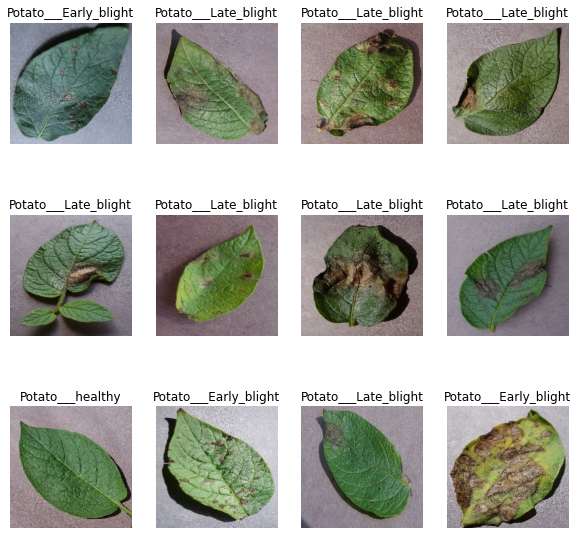

In [14]:
plt.figure(figsize = (10,10)) # for visualization of images
for image, lable in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[lable[i]])
        plt.axis("off")
   

In [15]:
train = dataset.take(51)
len(train)
test = dataset.skip(51)
len(test)

17

In [16]:
val = test.take(8)
test_final = test.skip(8)
len(test_final)

9

In [17]:
def data_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000): # function for data partition
    ds_size= len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train = ds.take(train_size)
    val = ds.skip(train_size).take(val_size)
    test = ds.skip(train_size).skip(val_size)
    
    return train, val, test

In [18]:
train, val, test = data_split(dataset)

In [19]:
len(train)

54

In [20]:
len(val)

6

In [21]:
len(test)

8

In [22]:
train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # cache & prefetch reduces processing time
val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),  # make image size 256 * 256
    layers.experimental.preprocessing.Rescaling(1.0/255)  # scaling
])

In [1]:
# data augmentation: Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [24]:
flip_and_rotation = tf.keras.Sequential([   
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),  # flip
    layers.experimental.preprocessing.RandomRotation(0.2)   # Rotation
])

In [25]:
n_classes = 3
input_shape = (batch_size, image_size, image_size, channel)
model = models.Sequential([
    resize_and_rescale,
    flip_and_rotation,
    layers.Conv2D(32,(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation = "softmax")
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [27]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [28]:
history = model.fit(
    train,
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_data=val
)

Epoch 1/10
54/54 [==============================] - 269s 5s/step - loss: 0.9315 - accuracy: 0.6673 - val_loss: 0.4610 - val_accuracy: 0.8802
Epoch 2/10
54/54 [==============================] - 233s 4s/step - loss: 0.4762 - accuracy: 0.8245 - val_loss: 0.3882 - val_accuracy: 0.8512
Epoch 3/10
54/54 [==============================] - 258s 5s/step - loss: 0.3517 - accuracy: 0.8669 - val_loss: 0.2156 - val_accuracy: 0.9219
Epoch 4/10
54/54 [==============================] - 225s 4s/step - loss: 0.2315 - accuracy: 0.9225 - val_loss: 0.2216 - val_accuracy: 0.9062
Epoch 5/10
54/54 [==============================] - 273s 5s/step - loss: 0.1841 - accuracy: 0.9337 - val_loss: 0.2803 - val_accuracy: 0.8906
Epoch 6/10
54/54 [==============================] - 208s 4s/step - loss: 0.1749 - accuracy: 0.9437 - val_loss: 0.1767 - val_accuracy: 0.9583
Epoch 7/10
54/54 [==============================] - 303s 6s/step - loss: 0.1597 - accuracy: 0.9472 - val_loss: 0.1393 - val_accuracy: 0.9583
Epoch 8/10
54

In [29]:
score = model.evaluate(test)

8/8 [==============================] - 14s 1s/step - loss: 0.1153 - accuracy: 0.9688


In [30]:
score

[0.11529341340065002, 0.96875]

In [31]:
history

In [32]:
print(history.params)

{'verbose': 1, 'epochs': 10, 'steps': 54}


In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
print(len(history.history['accuracy']))
history.history['accuracy']

10


[0.6672534942626953,
 0.8245305418968201,
 0.8668981194496155,
 0.922535240650177,
 0.9336854219436646,
 0.9436619877815247,
 0.9471830725669861,
 0.9260563254356384,
 0.9348591566085815,
 0.9542253613471985]

In [40]:
loss=history.history['loss']
accuracy=history.history['accuracy']

val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']


Text(0.5, 1.0, 'Training loss Vs Validation loss')

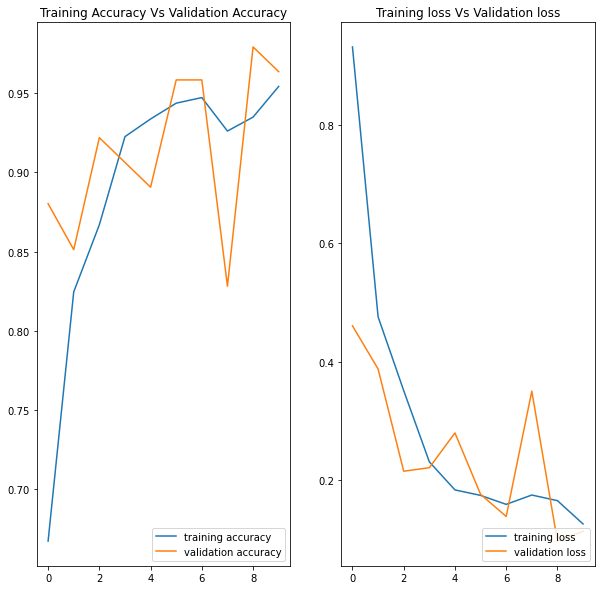

In [44]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.plot(range(epoch),accuracy,label="training accuracy")
plt.plot(range(epoch),val_accuracy,label="validation accuracy")
plt.legend(loc= "lower right")
plt.title("Training Accuracy Vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epoch),loss,label="training loss")
plt.plot(range(epoch),val_loss,label="validation loss")
plt.legend(loc= "lower right")
plt.title("Training loss Vs Validation loss")

In [3]:
# prediction on a sample image
for images_batch, labels_batch in test.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label: ', class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label: ', class_names[np.argmax(batch_prediction[0])])

NameError: name 'test' is not defined

In [ ]:
# Function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):b
    for i in range(6):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%' )
        plt.axis('off')

In [ ]:
# Save the model
model.save('path/to/save/model.h5')

In [ ]:
# load model
loaded_model = tf.keras.models.load_model('path/to/save/model.h5')
loaded_model = tf.saved_model.load("path/to/save/model")